# Importing Libraries

In [1]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
from keras.models import model_from_json
from keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.layers import Dense,Flatten,Conv2D,MaxPooling2D,Dropout
from keras.models import Sequential
from keras.optimizers import Adam

# Data Collection

Processed images in folder: without_mask
Processed images in folder: with_mask


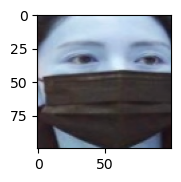

1

In [2]:
features = []
target = []

data_dir = "C:/Users/anand/Downloads/Projects/Mask Dtection Model/dataset"

for folder_name in os.listdir(data_dir):
    if os.path.isdir(os.path.join(data_dir, folder_name)):
        label = 0 if folder_name == "without_mask" else 1
        for filename in os.listdir(os.path.join(data_dir, folder_name)):
            image_path = os.path.join(data_dir, folder_name, filename)
            try:
                image = cv2.imread(image_path)
                if image is not None:
                    image = cv2.resize(image, (100, 100))
                    features.append(image)
                    target.append(label)
            except Exception as e:
                print(f"Error reading image {image_path}: {e}")

        print(f"Processed images in folder: {folder_name}")

plt.figure(figsize=(10,10))
plt.subplot(4,5,1)
plt.imshow(features[1950])
plt.show()

target[1950]

In [3]:
os.listdir("C:/Users/anand/Downloads/Projects/Mask Dtection Model/dataset")
features=np.array(features)
target=np.array(target)
features.shape
target.shape

(3810,)

# Splitting the data in to Traing and Testing data

In [4]:
features_train,features_test,target_train,target_test=train_test_split(features,target,test_size=0.2)
features_train.shape
# target_train.shape
# features_test.shape


(3048, 100, 100, 3)

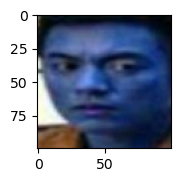

In [5]:
plt.figure(figsize=(10,10))
plt.subplot(4,5,1)
plt.imshow(features_train[240])
plt.show()

In [6]:
target_train[240]

0

# Data Preprocessing

In [7]:
def preprocessing(image):
    image=cv2.cvtColor(image,cv2.COLOR_BGR2GRAY)
    image=image/255
    return image

In [8]:
features_train=np.array(list(map(preprocessing,features_train)))

In [9]:
features_train=features_train.reshape(3048, 100, 100,1)

In [10]:
dataGen=ImageDataGenerator(rotation_range=10,width_shift_range=0.1,height_shift_range=0.1,zoom_range=0.2,shear_range=0.1)
dataGen.fit(features_train)
batches=dataGen.flow(features_train,target_train,batch_size=20)
images,labels=next(batches)

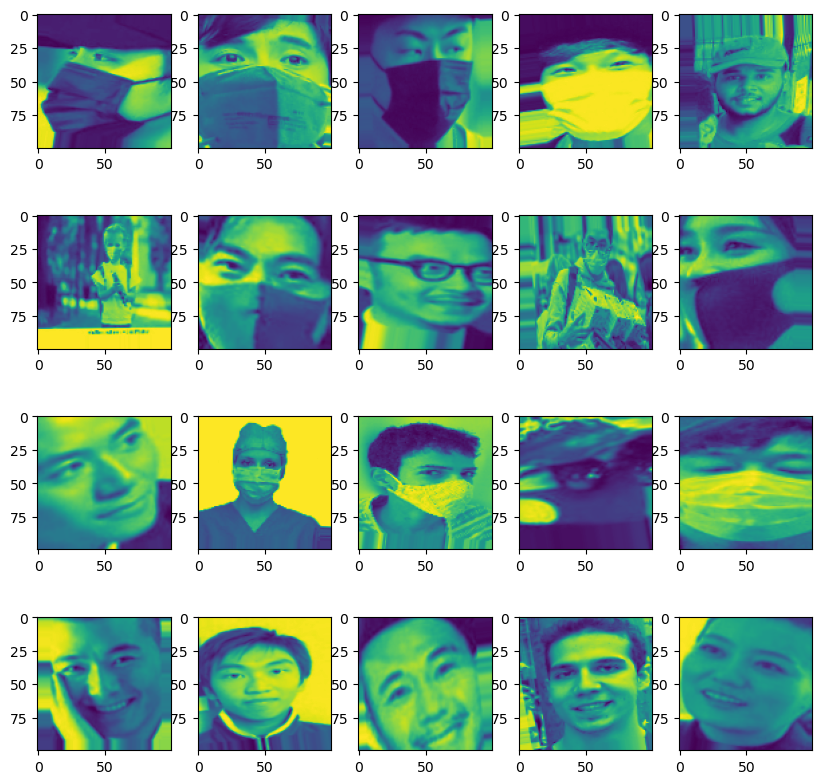

In [11]:
plt.figure(figsize=(10,10))
for i in range(0,20):
    plt.subplot(4,5,i+1)
    plt.imshow(images[i].reshape(100,100))
plt.show()

In [12]:
target_train=to_categorical(target_train)
target_train.shape

(3048, 2)

# Model Creation

In [13]:
model=Sequential()
model.add(Conv2D(100,(3,3),activation="relu",input_shape=(100,100,1)))
model.add(Conv2D(200,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(Conv2D(100,(3,3),activation="relu"))
model.add(MaxPooling2D((2,2)))
model.add(Dropout(0.5))
model.add(Flatten())
model.add(Dense(500,activation="relu"))
model.add(Dense(2,activation="softmax"))

C:\Users\anand\AppData\Roaming\Python\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Model Compilation and Model Fitting

In [14]:
model.compile(Adam(learning_rate=0.001),loss="categorical_crossentropy",metrics=["accuracy"])

In [19]:
model.fit(dataGen.flow(features_train, target_train, batch_size=20), epochs=20)

Epoch 1/20


C:\Users\anand\AppData\Roaming\Python\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


153/153 ━━━━━━━━━━━━━━━━━━━━ 236s 2s/step - accuracy: 0.5379 - loss: 0.7232
Epoch 2/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.6931 - loss: 0.5877
Epoch 3/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7133 - loss: 0.5523
Epoch 4/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 234s 2s/step - accuracy: 0.7885 - loss: 0.4422
Epoch 5/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 231s 2s/step - accuracy: 0.8257 - loss: 0.3707
Epoch 6/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.8604 - loss: 0.3248
Epoch 7/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 248s 2s/step - accuracy: 0.8841 - loss: 0.2891
Epoch 8/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8954 - loss: 0.2656
Epoch 9/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 232s 2s/step - accuracy: 0.8956 - loss: 0.2427
Epoch 10/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 251s 2s/step - accuracy: 0.9133 - loss: 0.2165
Epoch 11/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 278s 2s/step - accuracy: 0.9079 - loss: 0.2139
Epoch 12/20
153/153 ━━━━━━━━━━━━━━━━━━━━ 268s 2s/ste

# Step 4: Saving and Loading Model

In [ ]:
model_json=model.to_json()
with open("Mask_Detection.json","w") as abc:
    abc.write(model_json)
    abc.close()
model.save_weights("MaskDetection.weights.h5")
print("Save the Model")

In [15]:
from tensorflow.keras.models import model_from_json
from tensorflow.keras.models import Sequential

# Load the JSON model architecture
json_file = open("Mask_Detection.json", "r")
loaded_model_json = json_file.read()
json_file.close()

# Load the model from the JSON file
# Provide the Sequential class to the custom_objects parameter
loaded_model = model_from_json(loaded_model_json, custom_objects={"Sequential": Sequential})

# Load the weights
loaded_model.load_weights("C:/Users/anand/Downloads/Projects/Mask Dtection Model/mask detection/MaskDetection.weights.h5")
print("Loaded Model Successfully")


Loaded Model Successfully


In [16]:
def getClassName(classNo):
    if   classNo == 1: return 'With Mask'
    elif classNo == 0: return 'Without Mask'

In [17]:
capt=cv2.VideoCapture(0)
capt.set(3,640)
capt.set(4,480)
capt.set(10,180)

True

# Detecting Mask using Integrated Camera

In [18]:
import cv2
import numpy as np

# Initialize the video capture object

# Load the Haar cascade for face detection
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml")

# Verify if the classifier loaded correctly
if face_cascade.empty():
    print("Error loading Haar cascade file")
    exit()

while True:
    # Read frame from the video capture
    ret, image = capt.read()

    if not ret or image is None:
        print("Error reading image!")
        continue

    # Convert the image to grayscale
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Detect faces in the grayscale image
    faces = face_cascade.detectMultiScale(gray, 1.05, 3)

    for (x, y, w, h) in faces:
        detectedFace = image[y:y + h, x:x + w]
        detectedFace = cv2.resize(detectedFace, (100, 100))
        detectedFace = preprocessing(detectedFace)  # Ensure this function is defined
        detectedFace = detectedFace.reshape(1, 100, 100, 1)
        predictions = loaded_model.predict(detectedFace)  # Ensure 'loaded_model' is defined
        classIndex = np.argmax(predictions, axis=-1)
        probabilityValue = np.amax(predictions)

        cv2.rectangle(image, (x, y), (x + w, y + h), (0, 0, 255), 2)

        if probabilityValue > 0.30:
            class_name = getClassName(classIndex)  # Ensure 'getClassName' is defined
            cv2.putText(image, class_name, (x, y - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            cv2.putText(image, str(int(probabilityValue * 100)) + " %", (x + 120, y - 2), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 2)
            print(class_name)

    cv2.imshow("Model Prediction", image)
    returnedValue = cv2.waitKey(1)

    if returnedValue == ord("s") or returnedValue == ord("S"):
        cv2.destroyAllWindows()
        break

# Release the video capture object
capt.release()


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 390ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 77ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 75ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 70ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 72ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 63ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 68ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 64ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 74ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 65ms/step
Without Mask
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 62